In [69]:
import urllib.request
import os
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [244]:
os.chdir('/Users/amandachen/Desktop/Pecu/pecu-master')
filepath = 'clean_train_dataset.csv'
os.path.isfile(filepath)
df = pd.read_csv(filepath)
csv = np.genfromtxt (filepath, delimiter=",")
msk = np.random.rand(len(csv))<0.8
train = csv[msk]
test = csv[~msk]
x_train = train[1:, 1:]
y_train = train[1:,0].reshape(len(train)-1,1)
x_test = test[1:, 1:]
y_test = test[1:,0].reshape(len(test)-1,1)


In [245]:
df

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,boat,body,family
0,1,1,0,29.0000,0,0,211.3375,44,3,0,0,16
1,1,1,1,0.9167,1,2,151.5500,80,3,0,0,17
2,0,1,0,2.0000,1,2,151.5500,80,3,1,0,17
3,0,1,1,30.0000,1,2,151.5500,80,3,1,1,17
4,0,1,0,25.0000,1,2,151.5500,80,3,1,0,17
5,1,1,1,48.0000,0,0,26.5500,149,3,0,0,21
6,1,1,0,63.0000,1,0,77.9583,146,3,0,0,25
7,0,1,1,39.0000,0,0,0.0000,16,3,1,0,25
8,1,1,0,53.0000,2,0,51.4792,62,3,0,0,28
9,0,1,1,71.0000,0,0,49.5042,0,1,1,1,31


In [147]:
x_train

array([[   1.    ,    0.    ,   29.    , ...,    0.    ,   16.    ,    2.    ],
       [   1.    ,    1.    ,    0.9167, ...,    0.    ,   17.    ,    4.    ],
       [   1.    ,    0.    ,    2.    , ...,    0.    ,   17.    ,    4.    ],
       ..., 
       [   3.    ,    0.    ,   28.    , ...,    0.    ,  500.    ,    1.    ],
       [   3.    ,    1.    ,   28.    , ...,    0.    ,  501.    ,    1.    ],
       [   3.    ,    0.    ,   28.    , ...,    0.    ,  506.    ,    2.    ]])

In [174]:
y_train

array([[ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
      

In [246]:
from keras.models import Sequential
from keras.layers import Dense,Dropout


In [261]:
model = Sequential()
# model.add(Dense(units=100,
#                input_dim=13,
#                kernel_initializer='uniform',
#                activation='relu'))
model.add(Dense(units=50,
                input_dim=11,
               kernel_initializer='uniform',
               activation='relu'))
model.add(Dense(units=20,
               kernel_initializer='uniform',
               activation='relu'))
model.add(Dense(units=1,
               kernel_initializer='uniform',
               activation='tanh'))

In [262]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [263]:
train_history = model.fit(x=x_train, 
                          y=y_train,
                          validation_split=0.05,
                          epochs=100, 
                          batch_size=30,
                          verbose=1)

Train on 763 samples, validate on 41 samples
Epoch 1/100
763/763 [==============================] - 0s - loss: 1.9693 - acc: 0.5675 - val_loss: 0.6552 - val_acc: 0.7317
Epoch 2/100
763/763 [==============================] - 0s - loss: 0.6638 - acc: 0.6422 - val_loss: 0.6676 - val_acc: 0.7073
Epoch 3/100
763/763 [==============================] - 0s - loss: 0.6406 - acc: 0.6710 - val_loss: 0.6557 - val_acc: 0.7561
Epoch 4/100
763/763 [==============================] - 0s - loss: 0.6304 - acc: 0.6789 - val_loss: 0.6402 - val_acc: 0.7317
Epoch 5/100
763/763 [==============================] - 0s - loss: 0.6216 - acc: 0.6776 - val_loss: 0.6263 - val_acc: 0.7317
Epoch 6/100
763/763 [==============================] - 0s - loss: 0.6178 - acc: 0.6946 - val_loss: 0.6026 - val_acc: 0.7317
Epoch 7/100
763/763 [==============================] - 0s - loss: 0.6036 - acc: 0.6986 - val_loss: 0.5806 - val_acc: 0.7317
Epoch 8/100
763/763 [==============================] - 0s - loss: 0.5983 - acc: 0.6855 

763/763 [==============================] - 0s - loss: 0.1560 - acc: 0.9620 - val_loss: 0.2152 - val_acc: 0.9512
Epoch 66/100
763/763 [==============================] - 0s - loss: 0.1489 - acc: 0.9712 - val_loss: 0.1621 - val_acc: 0.9756
Epoch 67/100
763/763 [==============================] - 0s - loss: 0.1415 - acc: 0.9672 - val_loss: 0.1490 - val_acc: 0.9268
Epoch 68/100
763/763 [==============================] - 0s - loss: 0.1371 - acc: 0.9672 - val_loss: 0.1886 - val_acc: 0.9268
Epoch 69/100
763/763 [==============================] - 0s - loss: 0.1255 - acc: 0.9725 - val_loss: 0.1651 - val_acc: 0.9756
Epoch 70/100
763/763 [==============================] - 0s - loss: 0.1205 - acc: 0.9699 - val_loss: 0.1941 - val_acc: 0.9268
Epoch 71/100
763/763 [==============================] - 0s - loss: 0.2815 - acc: 0.9240 - val_loss: 0.2199 - val_acc: 0.8293
Epoch 72/100
763/763 [==============================] - 0s - loss: 0.1578 - acc: 0.9292 - val_loss: 0.1638 - val_acc: 0.9756
Epoch 73/100


In [250]:
def show_train_history(train_histroy, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

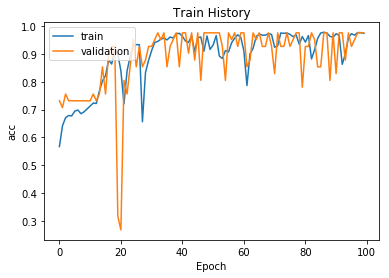

In [264]:
train = 'acc'
validation = 'val_acc'
plt.plot(train_history.history[train])
plt.plot(train_history.history[validation])
plt.title('Train History')
plt.xlabel('Epoch')
plt.ylabel(train)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

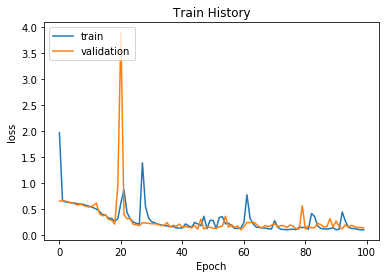

In [265]:
train = 'loss'
validation = 'val_loss'
plt.plot(train_history.history[train])
plt.plot(train_history.history[validation])
plt.title('Train History')
plt.xlabel('Epoch')
plt.ylabel(train)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [266]:
scores = model.evaluate(x_test,y_test)
print()
print('accuracy=',scores[1])

 32/195 [===>..........................] - ETA: 0s
accuracy= 0.969230769231


In [267]:
filepath = 'clean_test_dataset.csv'
os.path.isfile(filepath)
df = pd.read_csv(filepath)
csv = np.genfromtxt (filepath, delimiter=",")
x_testing = csv[1:, 1:]
len(x_testing)

309

In [268]:
ans = model.predict(x_testing)
ans
np.savetxt("ans3.csv", ans, delimiter=",")